In [1]:
%matplotlib inline

import numpy as np
import os

from fashionpedia.fp import Fashionpedia
import json
import pandas as pd
from PIL import Image
import ast
import matplotlib.pyplot as plt

In [2]:
dataset_path = "/home/cat/projects/CV-stuff/datasets/fashionpedia/"
img_train_root = dataset_path + "train/"
img_val_root = dataset_path + "test/"
crop_img_train_root = dataset_path + "crop_train/"
crop_img_val_root = dataset_path + "crop_test/"

# original names
ann_train_file = "instances_attributes_train2020.json"
ann_val_file = "instances_attributes_val2020.json"
# ann_train_file = "attributes_train2020.json"
# ann_val_file = "attributes_val2020.json"

info_file = "info_test2020.json"

# for commercial use names
ann_com_train = "instances_attributes_commercial_train.csv"
ann_com_val = "instances_attributes_commercial_val.csv"

crop_ann_com_train = "instances_attributes_commercial_train_crop.csv"
crop_ann_com_val = "instances_attributes_commercial_val_crop.csv"
# ann_com_train = "attributes_commercial_train.csv"
# ann_com_val = "attributes_commercial_val.csv"

In [4]:
for i, row in df_val.head().iterrows():
    active_attrs = row[row == 1].index.tolist()
    print(f"Row {i}: {active_attrs}")

Row 0: ['attr_160', 'attr_204']
Row 1: ['attr_160', 'attr_204']
Row 2: ['attr_80', 'attr_85', 'attr_115', 'attr_136', 'attr_137', 'attr_145', 'attr_229', 'attr_295', 'attr_311', 'attr_317']
Row 3: []
Row 4: []


In [12]:
import json

# Paths
input_json = dataset_path+ann_val_file
# output_json = dataset_path+"instances_attributes_val2020_filtered_test.json"

# Allowed licenses and category IDs to remove
allowed_ids = [0, 1, 6, 7, 8, 9, 10]
remove_cat_ids = [13, 14, 15, 16, 17, 18, 20, 21, 22, 26, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]

# Load JSON
with open(input_json, "r") as f:
    data = json.load(f)

# 1️⃣ Filter images by allowed licenses
filtered_images = [img for img in data["images"] if img["license"] in allowed_ids]
filtered_image_ids = {img["id"] for img in filtered_images}

# 2️⃣ Filter annotations:
# - Keep only annotations whose image_id is in allowed images
# - Remove annotations whose category_id is in remove_cat_ids
filtered_annotations = [
    ann for ann in data["annotations"]
    if ann["image_id"] in filtered_image_ids and ann["category_id"] not in remove_cat_ids
]

# 3️⃣ Optional: remove unused categories
# used_category_ids = {ann["category_id"] for ann in filtered_annotations}
# filtered_categories = [cat for cat in data["categories"] if cat["id"] in used_category_ids]

# Replace with filtered data
data["images"] = filtered_images
data["annotations"] = filtered_annotations
# data["categories"] = filtered_categories

# Save JSON
# with open(output_json, "w") as f:
#     json.dump(data, f, indent=2)

# print(f"Filtered JSON saved to {output_json}")


In [13]:
with open(output_json, "r") as f:
    data = json.load(f)

    # Convert to DataFrames
df_annotations = pd.DataFrame(data["annotations"])
df_images = pd.DataFrame(data["images"])
df_cats = pd.DataFrame(data["categories"])


NameError: name 'output_json' is not defined

In [ ]:
df_cats

,id,name,supercategory,level,taxonomy_id
0,0,"shirt, blouse",upperbody,2,combo000000
1,1,"top, t-shirt, sweatshirt",upperbody,2,combo000001
2,2,sweater,upperbody,2,obj000008_00
3,3,cardigan,upperbody,2,obj000009_00
4,4,jacket,upperbody,2,obj000010_00
5,5,vest,upperbody,2,obj000011_00
6,6,pants,lowerbody,2,obj000013_00
7,7,shorts,lowerbody,2,obj000014_00
8,8,skirt,lowerbody,2,obj000015_00
9,9,coat,wholebody,2,obj000017_00


In [ ]:
data.keys()

dict_keys(['annotations', 'images', 'info', 'licenses', 'categories', 'attributes'])

In [ ]:
# Filter annotations for sleeves
sleeves_annotations = df_annotations[df_annotations['category_id'] == 31]

# Count per image
sleeves_count_per_image = sleeves_annotations.groupby('image_id').size().reset_index(name='sleeves_count')
sleeves_count_per_image[sleeves_count_per_image['sleeves_count']>2]

,image_id,sleeves_count
8,62,4
48,343,3
57,404,3
83,585,4
106,724,4
...,...,...
9502,50269,3
9509,50308,4
9522,50368,4
9533,50401,3


In [ ]:
allowed_ids = [0, 1, 2, 3, 4, 5]

# Filter annotations to only allowed category IDs
filtered_annots = df_annotations[df_annotations['category_id'].isin(allowed_ids)]

# Group by image_id and count unique category_ids
image_category_counts = filtered_annots.groupby('image_id')['category_id'].nunique()

# Keep images with exactly 1 unique category
images_with_one_category = image_category_counts[image_category_counts == 1].index.tolist()

# Optionally get all annotations for these images
final_annotations = filtered_annots[filtered_annots['image_id'].isin(images_with_one_category)]
final_annotations.head()

,image_id,category_id,attribute_ids,segmentation,bbox,area,iscrowd,id
9,15165,0,"[225, 135, 295, 142, 145, 114, 147, 115, 316, ...","[[209, 388, 212, 373, 219, 345, 227, 321, 228,...","[204.0, 215.0, 297.0, 352.0]",77612,0,35
20,13368,1,"[295, 136, 305, 146, 115, 145, 312, 317]","[[601, 308, 598, 310, 601, 311, 602, 313, 602,...","[572.0, 282.0, 100.0, 245.0]",15592,0,64
27,20437,4,"[316, 137, 17, 295, 322, 149, 145]","[[263, 602, 265, 573, 268, 542, 271, 487, 266,...","[252.0, 169.0, 251.0, 496.0]",97510,0,88
36,15261,4,"[317, 316, 146, 229, 20, 135, 115, 141]","[[517, 447, 509, 443, 514, 433, 516, 419, 521,...","[503.0, 206.0, 223.0, 259.0]",35535,0,107
55,19420,4,"[317, 142, 295, 136, 289, 147, 19]","[[326, 292, 326, 281, 329, 274, 327, 267, 327,...","[326.0, 239.0, 57.0, 121.0]",5211,0,225


In [ ]:
# Load JSON
def load_cat_attr(dataset_path, filename):
    with open(dataset_path+filename, "r") as f:
        data = json.load(f)

    # Convert to DataFrames
    df_attributes = pd.DataFrame(data["attributes"])
    df_categories = pd.DataFrame(data["categories"])
    return df_categories, df_attributes

def convert_json_to_csv(dataset_path, filename, new_filename):
    with open(dataset_path+filename, "r") as f:
        data = json.load(f)

    # Convert to DataFrames
    df_annotations = pd.DataFrame(data["annotations"])
    df_images = pd.DataFrame(data["images"])

    # safe for commercial use: 0, 1, 6, 7, 8, 9, 10
    allowed_ids = [0, 1, 6, 7, 8, 9, 10]
    # keep images only with allowed licences
    df_images_filtered = df_images[df_images['license'].isin(allowed_ids)].copy()
    # print(df_images_filtered.head())

    print(f"Original images: {len(df_images)}")
    print(f"Filtered images: {len(df_images_filtered)}")

    # print(df_annotations.head())
    # merge images with attributes and drop not useful columns
    df_annotations_filtered = df_annotations.merge(
        df_images_filtered,
        left_on='image_id',
        right_on='id',
        how='inner'
    ).drop(columns=['id_x', 'id_y', 'time_captured', 'segmentation', 'area', 'iscrowd', 'original_url', 'isstatic', 'kaggle_id'])
    print(df_annotations_filtered.head())
    # save to a csv file
    # df_annotations_filtered.to_csv(dataset_path+new_filename,index=False)


# uncomment to convert and filter dataset
# convert_json_to_csv(dataset_path, ann_train_file, ann_com_train)
convert_json_to_csv(dataset_path, ann_val_file, ann_com_val)

Original images: 1158
Filtered images: 330
   image_id  category_id                                     attribute_ids  \
0     17039           31                                        [160, 204]   
1     17039           31                                        [160, 204]   
2     17039            9  [229, 295, 136, 137, 80, 145, 115, 85, 311, 317]   
3     17039           25                                                []   
4     17039           27                                                []   

                           bbox  width  height  \
0   [391.0, 460.0, 75.0, 193.0]   1024     682   
1   [583.0, 452.0, 50.0, 228.0]   1024     682   
2  [392.0, 407.0, 241.0, 274.0]   1024     682   
3  [460.0, 389.0, 136.0, 109.0]   1024     682   
4   [442.0, 407.0, 166.0, 51.0]   1024     682   

                              file_name  license  
0  99601fa457d157b81154d089966c2e3a.jpg        7  
1  99601fa457d157b81154d089966c2e3a.jpg        7  
2  99601fa457d157b81154d089966c2e3

In [ ]:
# attributes are not categories, but this dataset contains only attributes
df_categories, df_attributes = load_cat_attr(dataset_path, info_file)
df_attributes.head()

,id,name,supercategory,level,taxonomy_id
0,0,classic (t-shirt),nickname,1,att000002_00
1,1,polo (shirt),nickname,1,att000003_00
2,2,undershirt,nickname,1,att000004_00
3,3,henley (shirt),nickname,1,att000005_00
4,4,ringer (t-shirt),nickname,1,att000006_00


In [ ]:

# print(df_attributes.head(50))
print(df_attributes.to_string())

      id                                name                                supercategory  level   taxonomy_id
0      0                   classic (t-shirt)                                     nickname      1  att000002_00
1      1                        polo (shirt)                                     nickname      1  att000003_00
2      2                          undershirt                                     nickname      1  att000004_00
3      3                      henley (shirt)                                     nickname      1  att000005_00
4      4                    ringer (t-shirt)                                     nickname      1  att000006_00
5      5                    raglan (t-shirt)                                     nickname      1  att000007_00
6      6                       rugby (shirt)                                     nickname      1  att000008_00
7      7                      sailor (shirt)                                     nickname      1  att000009_00
8

In [ ]:
id_to_attr_name = df_attributes.set_index('id')['name'].to_dict()
id_to_cat_name = df_categories.set_index('id')['name'].to_dict()

In [ ]:
# ['glasses', 'hat', 'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'leg warmer', 
# 'tights, stockings', 'sock', 'umbrella', 'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon',
#  'rivet', 'ruffle', 'sequin', 'tassel']

def filter_categories(df):
    remove_cat_ids = [13, 14, 15, 16, 17, 18, 20, 21, 22, 26, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
    return df[~df["category_id"].isin(remove_cat_ids)].copy()

In [ ]:
# Count the frequency of each category
def plot_counts(df):
    category_counts = df["category_id"].value_counts()

    # Map IDs → names
    category_counts.index = category_counts.index.map(id_to_cat_name)
    # Plot
    plt.figure(figsize=(12,6))
    category_counts.plot(kind="bar")

    plt.title("Distribution of Categories")
    plt.xlabel("Category ID")
    plt.ylabel("Number of Annotations")
    plt.show()

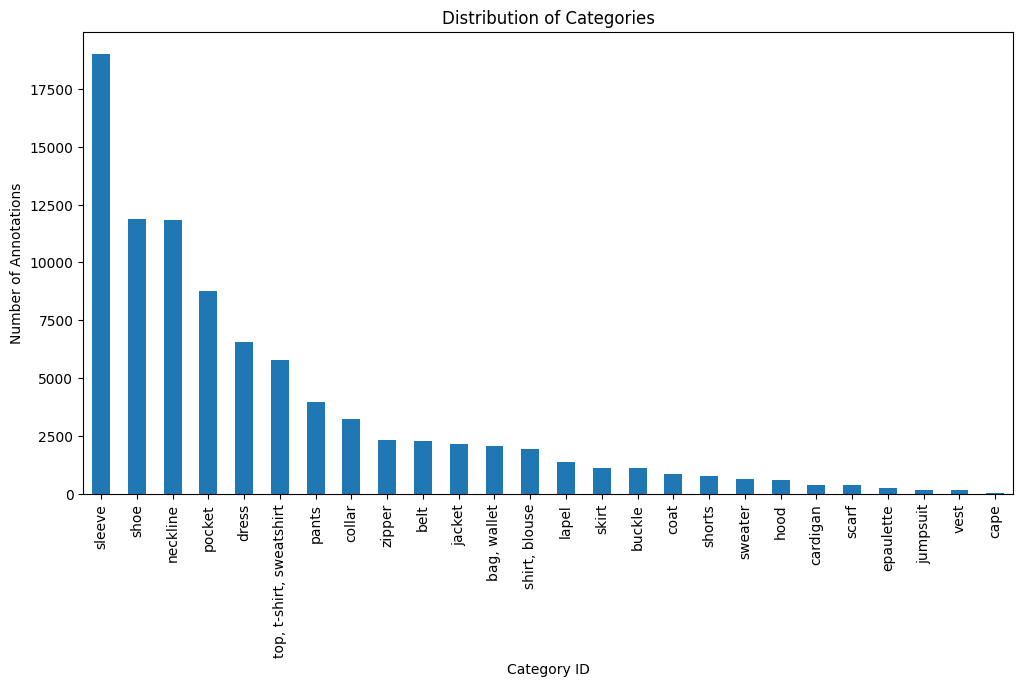

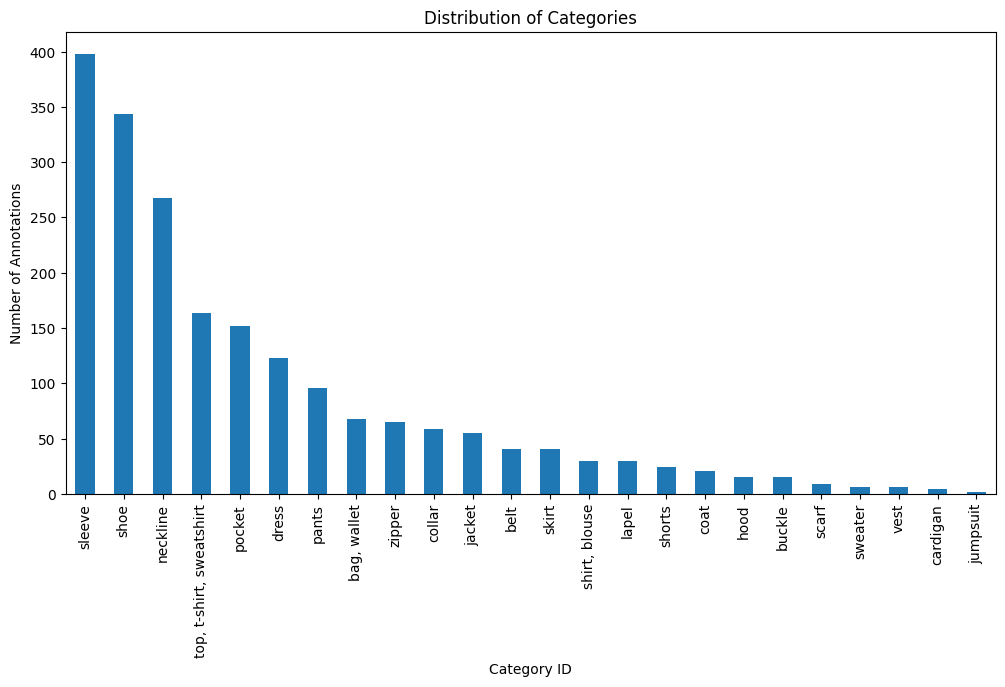

In [ ]:
def filter_and_save(dataset_path, ann_com_train, new_filename):
    df_train = pd.read_csv(dataset_path+ann_com_train)
    df_train = filter_categories(df_train)
    plot_counts(df_train)
    df_train.to_csv(dataset_path+new_filename,index=False)

# filter_and_save(dataset_path, ann_com_train, "instances_attributes_commercial_train_filtered.csv")
# filter_and_save(dataset_path, ann_com_val, "instances_attributes_commercial_val_filtered.csv")

In [ ]:
# Show first N images
def show_images(df, N=5, fixed_height=324):
    for idx, row in df.head(N).iterrows():
        img_path = row['file_name']  # adjust if full path is needed
        img = Image.open(img_root+img_path)
        height_percent = (fixed_height / float(img.size[1]))
        width_size = int((float(img.size[0]) * float(height_percent)))
        img = img.resize((width_size, fixed_height), Image.NEAREST)
        attr = row['attribute_ids']
        attr_ids = ast.literal_eval(row['attribute_ids'])
        attr_names = [id_to_attr_name.get(i, f"Unknown({i})") for i in attr_ids]
        print(attr_names)
        display(img)

In [ ]:
df_attr = pd.read_csv(dataset_path+ann_com_train)
# df_attr.to_json(dataset_path+"attributes_commercial_train.json", orient='records', lines=True)

['sheath (dress)', 'symmetrical', 'straight', 'normal waist', 'collarless', 'straight across (neck)', 'no non-textile material', 'printed', 'no special manufacturing technique', 'plain (pattern)', 'floral']


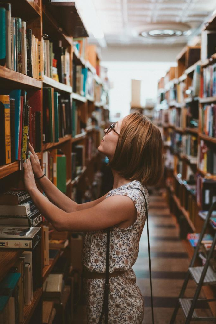

['jeans', 'asymmetrical', 'symmetrical', 'straight', 'tight (fit)', 'regular (fit)', 'normal waist', 'no waistline', 'hip (length)', 'maxi (length)', 'wrist-length', 'set-in sleeve', 'curved (pocket)', 'single breasted', 'fly (opening)', 'no non-textile material', 'washed', 'no special manufacturing technique', 'plain (pattern)']


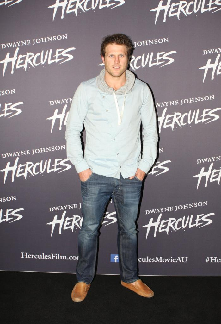

['trench (coat)', 'symmetrical', 'regular (fit)', 'normal waist', 'no waistline', 'above-the-hip (length)', 'hip (length)', 'micro (length)', 'wrist-length', 'oval (neck)', 'u-neck', 'set-in sleeve', 'patch (pocket)', 'flap (pocket)', 'zip-up', 'no non-textile material', 'gathering', 'lining', 'applique(a)', 'no special manufacturing technique', 'plain (pattern)']


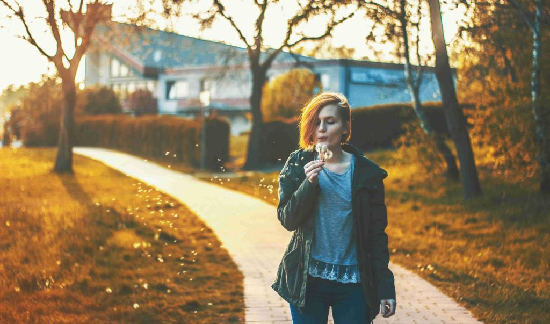

['blazer', 'leggings', 'symmetrical', 'tight (fit)', 'loose (fit)', 'no waistline', 'mini (length)', 'maxi (length)', 'wrist-length', 'set-in sleeve', 'fly (opening)', 'no non-textile material', 'no special manufacturing technique', 'plain (pattern)', 'check']


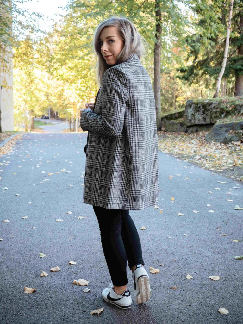

['biker (jacket)', 'tunic (dress)', 'symmetrical', 'peplum', 'tent', 'tight (fit)', 'high waist', 'above-the-hip (length)', 'floor (length)', 'wrist-length', 'regular (collar)', 'set-in sleeve', 'zip-up', 'no non-textile material', 'pleat', 'no special manufacturing technique', 'plain (pattern)']


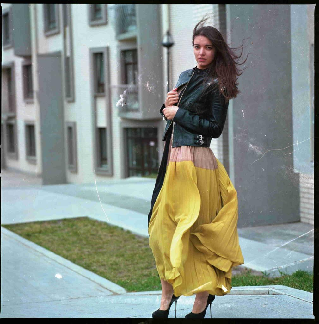

In [ ]:
# tie = df[df["category_id"] == 44]
show_images(df_attr)

In [ ]:
# from tensorflow.lite.python import interpreter as interpreter_wrapper
# model_path = "/home/cat/projects/CV-stuff/latl/classification/notebooks/saved_model/yolo_x_nano_float32.tflite"
# model = interpreter_wrapper.Interpreter(model_path=model_path)
# model.allocate_tensors()

2025-08-25 16:46:54.338895: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-25 16:46:54.470087: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756133214.526506  558320 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756133214.542030  558320 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756133214.693988  558320 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [ ]:
# import cv2
# import numpy as np

# def letterbox_image(image, max_size=640, color=(114, 114, 114)):
#     h, w = image.shape[:2]
#     scale = max_size / max(h, w)
#     new_w, new_h = int(w * scale), int(h * scale)
    
#     # Resize while keeping aspect ratio
#     resized_image = cv2.resize(image, (new_w, new_h))
    
#     # Create padded image
#     padded_image = np.full((max_size, max_size, 3), color, dtype=np.uint8)
    
#     # Compute top-left corner for placing resized image
#     top = (max_size - new_h) // 2
#     left = (max_size - new_w) // 2
    
#     padded_image[top:top+new_h, left:left+new_w] = resized_image
#     return padded_image, scale, left, top

In [ ]:
# from super_gradients.training.utils.media.image import load_image
# url = "https://github.com/KMnP/fashionpedia-api/blob/1ef732050e15d446c38d58ef945ccadc28c59328/data/demo/input.jpg?raw=true"
# image = load_image(url)
# print("loaded image ",image.shape)
# # display(Image.fromarray(image))
# image, _,_,_ = letterbox_image(image, max_size=640)
# print("letter image ",image.shape)

# # display(Image.fromarray(image))
# image_bchw = np.expand_dims(image, 0)
# print("letter image ",image_bchw.shape) 


loaded image  (1024, 683, 3)
letter image  (640, 640, 3)
letter image  (1, 640, 640, 3)


In [ ]:
# input_details = model.get_input_details()
# output_details = model.get_output_details()

# print("Input details:", input_details)
# print("Output details:", output_details)

Input details: [{'name': 'input', 'index': 0, 'shape': array([  1, 640, 640,   3], dtype=int32), 'shape_signature': array([  1, 640, 640,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'Identity', 'index': 335, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.int64'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'Identity_1', 'index': 1643, 'shape': array([   1, 1000,    4], dtype=int32), 'shape_signature': array([   1, 1000,    4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zer

In [ ]:
# # Set tensor
# model.set_tensor(input_details[0]['index'], image_bchw)

# # Run inference
# model.invoke()

# # Get output
# num_detections = int(model.get_tensor(output_details[0]['index'])[0])
# boxes = model.get_tensor(output_details[1]['index'])[0]  # (1000, 4)
# scores = model.get_tensor(output_details[2]['index'])[0]  # (1000,)
# classes = model.get_tensor(output_details[3]['index'])[0]  # (1000,)

# # Keep only valid detections
# boxes = boxes[:num_detections]
# scores = scores[:num_detections]
# classes = classes[:num_detections]

# # Example: convert first box to pixel coordinates
# h, w = image.shape[:2]  # your image size
# ymin, xmin, ymax, xmax = boxes[0]
# xmin, xmax = int(xmin * w), int(xmax * w)
# ymin, ymax = int(ymin * h), int(ymax * h)

# for i in range(num_detections):
#     print(f"Class: {classes[i]}, Score: {scores[i]:.2f}, Box: {(boxes[i])}")


/tmp/ipykernel_558320/326559561.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num_detections = int(model.get_tensor(output_details[0]['index'])[0])


Class: 0, Score: 0.92, Box: [164.65434   29.852753 487.84003  641.7622  ]
Class: 0, Score: 0.62, Box: [150.6434  215.08505 202.61533 357.42154]
Class: 0, Score: 0.60, Box: [124.71978 246.84015 164.91768 366.58136]
Class: 0, Score: 0.12, Box: [105.46771 266.51346 131.48518 373.14413]
Class: 0, Score: 0.12, Box: [ 27.90707  18.37561 145.58838 626.6502 ]
Class: 0, Score: 0.10, Box: [437.83408 195.94244 506.46255 325.03058]
Class: 0, Score: 0.92, Box: [164.65434   29.852753 487.84003  641.7622  ]
Class: 0, Score: 0.92, Box: [164.65434   29.852753 487.84003  641.7622  ]
Class: 0, Score: 0.92, Box: [164.65434   29.852753 487.84003  641.7622  ]
Class: 0, Score: 0.92, Box: [164.65434   29.852753 487.84003  641.7622  ]
Class: 0, Score: 0.92, Box: [164.65434   29.852753 487.84003  641.7622  ]
Class: 0, Score: 0.92, Box: [164.65434   29.852753 487.84003  641.7622  ]
Class: 0, Score: 0.92, Box: [164.65434   29.852753 487.84003  641.7622  ]
Class: 0, Score: 0.92, Box: [164.65434   29.852753 487.840